## Import relevant Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
import numpy as np
import cv2
from glob import glob
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model



In [5]:
train_path = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
test_path ='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
malignant = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant'
benign = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign'

## Visualizing some Images

In [6]:
def visualize_images(folder_path):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4

    # Get a list of image file names in the folder
    images = os.listdir(folder_path)

    # Visualize the images
    for i in range(1, columns * rows + 1):
        image_path = os.path.join(folder_path, images[i])
        img = plt.imread(image_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()

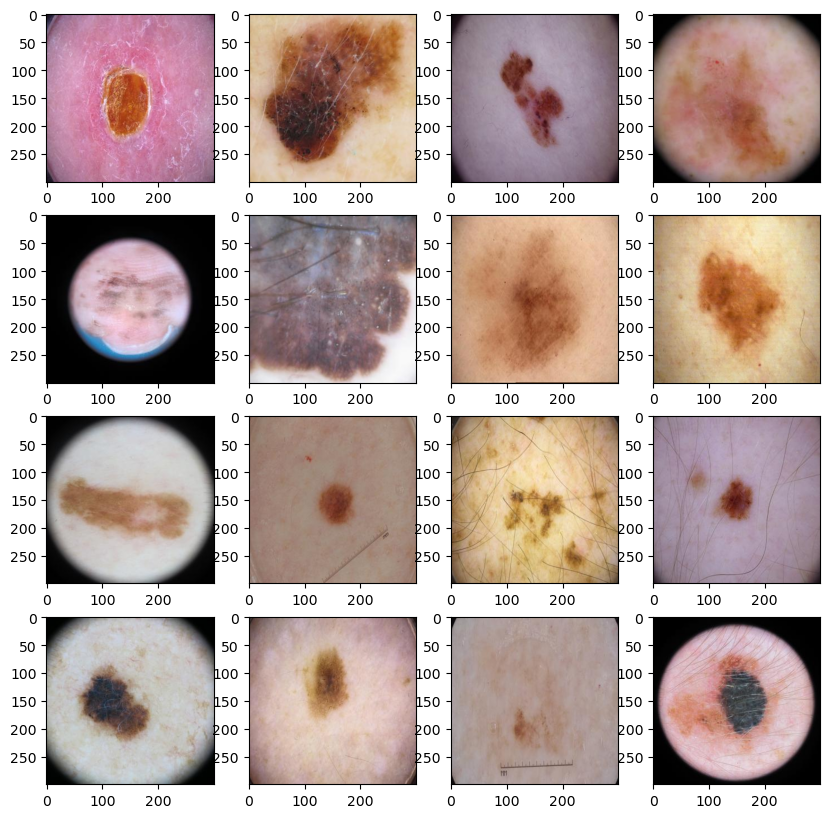

In [7]:
# Visualize images from training folder
visualize_images(malignant)

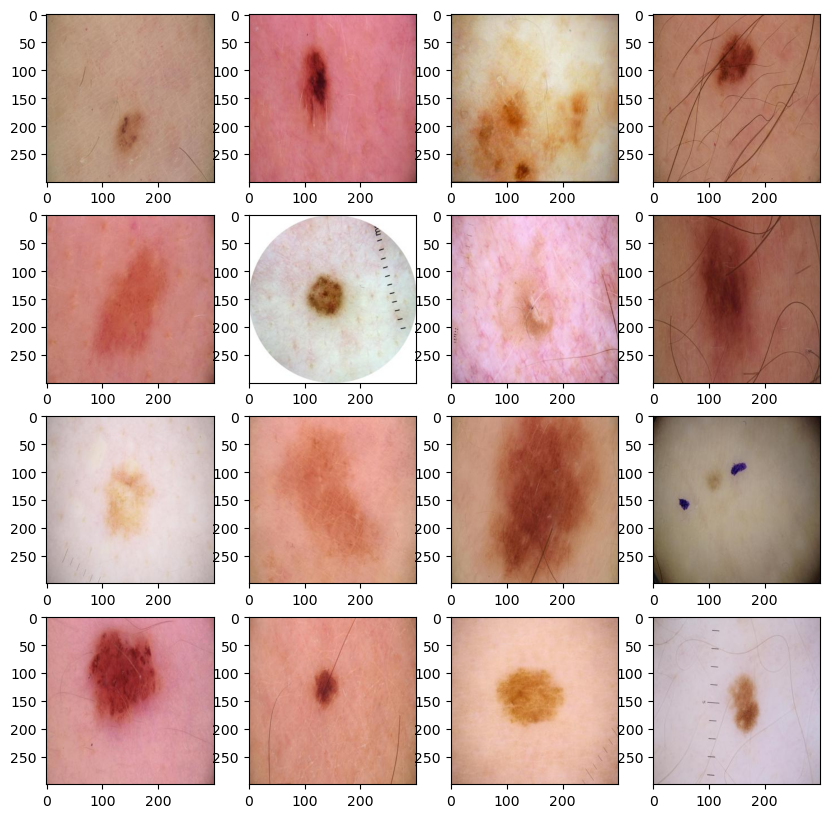

In [8]:
# Visualize images from test folder
visualize_images(benign)

In [9]:
class_names = ['malignant', 'benign']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'malignant': 0, 'benign': 1}

In [10]:
Image_Size = (224,224)

In [16]:
def load_images_and_labels():

  DIRECTORY = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset'
  CATEGORY = ['train', 'test']

  output = []

  for category in CATEGORY:
    path = os.path.join(DIRECTORY, category)
    images = []
    labels = []

    for folder in os.listdir(path):
      label = class_names_label[folder]

      for file in os.listdir(os.path.join(path,folder)):

        img_path = os.path.join(os.path.join(path,folder),file)

        # Open and resize the image
        image = cv2.imread(img_path)
        image = cv2.resize(image, Image_Size)

        images.append(image)
        labels.append(label)


    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images,labels))

  return output



In [17]:
(train_images, train_labels), (test_images, test_labels) = load_images_and_labels()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [19]:
loss_fn = keras.losses.BinaryCrossentropy()

model.compile(optimizer = 'adam', loss = loss_fn,  metrics = ['accuracy'])

In [20]:
train_labels = np.asarray(train_labels).astype('float32').reshape((-1,1))

In [21]:
history = model.fit(train_images, train_labels, batch_size= 128, epochs = 20,  validation_split = 0.2)

Epoch 1/20
61/61 [==============================] - 309s 5s/step - loss: 160.2221 - accuracy: 0.7011 - val_loss: 0.4093 - val_accuracy: 0.8001
Epoch 2/20
61/61 [==============================] - 315s 5s/step - loss: 0.4112 - accuracy: 0.8250 - val_loss: 0.4842 - val_accuracy: 0.7064
Epoch 3/20
61/61 [==============================] - 315s 5s/step - loss: 0.3740 - accuracy: 0.8451 - val_loss: 0.4471 - val_accuracy: 0.7132
Epoch 4/20
61/61 [==============================] - 314s 5s/step - loss: 0.4260 - accuracy: 0.8265 - val_loss: 0.2922 - val_accuracy: 0.9115
Epoch 5/20
61/61 [==============================] - 316s 5s/step - loss: 0.3744 - accuracy: 0.8454 - val_loss: 0.4629 - val_accuracy: 0.7814
Epoch 6/20
61/61 [==============================] - 317s 5s/step - loss: 0.3130 - accuracy: 0.8752 - val_loss: 0.6078 - val_accuracy: 0.6903
Epoch 7/20
61/61 [==============================] - 314s 5s/step - loss: 0.3502 - accuracy: 0.8524 - val_loss: 0.8385 - val_accuracy: 0.6065
Epoch 8/20


In [22]:
def plot_accuracy_loss(history):
    
    
    fig = plt.figure(figsize=(10,5))
    
    # Plot the accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label = 'acc')
    plt.plot(history.history['val_accuracy'], label = 'val_acc')
    plt.title('train accuracy vs validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    
    # Plot loss
    plt.subplot(222)
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    
    plt.legend()
    plt.show()

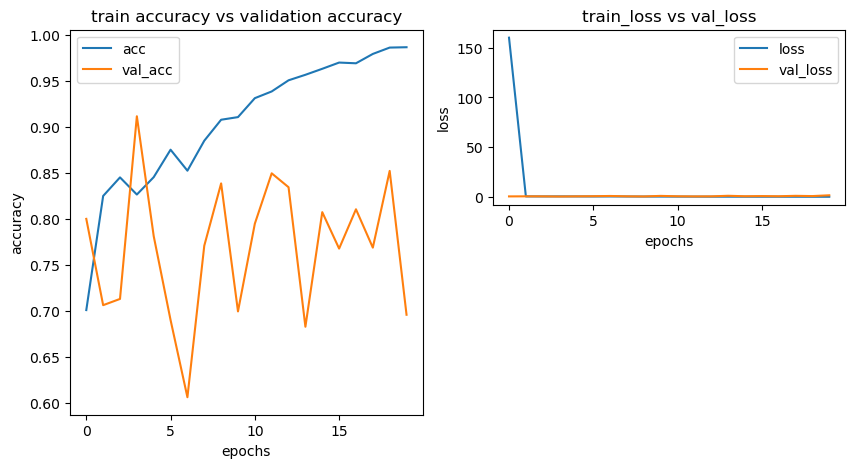

In [24]:
plot_accuracy_loss(history)

In [25]:
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 11s 322ms/step - loss: 0.8572 - accuracy: 0.8400


## Inception V3

In [11]:
IMAGE_SIZE = [224, 224]

In [12]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [13]:
for layer in inception.layers:
    layer.trainable = False

In [14]:
x = Flatten()(inception.output)

In [15]:

prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 9605 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [24]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/tmp/ipykernel_33/337479791.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
301/301 [==============================] - 430s 1s/step - loss: 0.7146 - accuracy: 0.8463 - val_loss: 0.8487 - val_accuracy: 0.8680
Epoch 2/15
301/301 [==============================] - 426s 1s/step - loss: 0.5660 - accuracy: 0.8689 - val_loss: 0.6103 - val_accuracy: 0.9000
Epoch 3/15
301/301 [==============================] - 424s 1s/step - loss: 0.5355 - accuracy: 0.8813 - val_loss: 0.6651 - val_accuracy: 0.8840
Epoch 4/15
301/301 [==============================] - 427s 1s/step - loss: 0.6357 - accuracy: 0.8779 - val_loss: 0.6810 - val_accuracy: 0.8710
Epoch 5/15
301/301 [==============================] - 424s 1s/step - loss: 0.5334 - accuracy: 0.8947 - val_loss: 0.7552 - val_accuracy: 0.8360
Epoch 6/15
301/301 [==============================] - 425s 1s/step - loss: 0.5587 - accuracy: 0.8920 - val_loss: 0.6324 - val_accuracy: 0.9070
Epoch 7/15
301/301 [==============================] - 426s 1s/step - loss: 0.5918 - accuracy: 0.8967 - val_loss: 0.7017 - val_accuracy: 0.8880

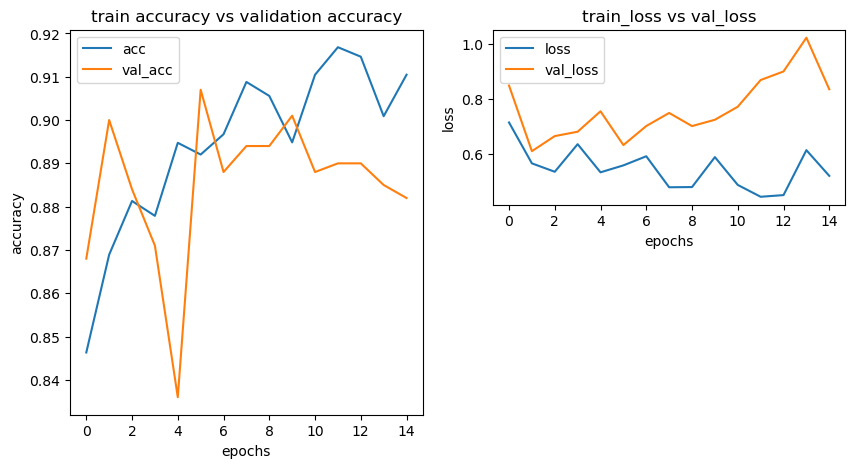

In [25]:
plot_accuracy_loss(r)

In [26]:
model.save('model_inception.h5')